# Data Understanding (Visualizations)

In [1]:
#Importing general packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(u'fivethirtyeight')

In [2]:
opp_data = pd.read_csv('opponent.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
opp_data.head()

,begseat,channel,endseat,event_date,instance,opponent,pc,quantity,row,section,...,Dario Saric,Timothe Luwawu-Cabarrot,Richaun Holmes,Monta Ellis,DeAndre Jordan,Chris Paul,J.J. Redick,Paul Pierce,Luc Mbah a Moute,Rajon Rondo
0,1,StubHub,2,2017-02-01,01/02/2017_1/15/1.0/2.0,new york knicks,R,2,15,1,...,0,0,0,0,0,0,0,0,0,0
1,12,StubHub,13,2017-02-01,01/02/2017_1/15/12.0/13.0,new york knicks,R,2,15,1,...,0,0,0,0,0,0,0,0,0,0
2,14,Ticketmaster,15,2017-02-01,01/02/2017_1/15/14.0/15.0,new york knicks,R,2,15,1,...,0,0,0,0,0,0,0,0,0,0
3,3,Ticket Network,6,2017-02-01,01/02/2017_1/15/3.0/6.0,new york knicks,R,4,15,1,...,0,0,0,0,0,0,0,0,0,0
4,1,StubHub,2,2017-02-01,01/02/2017_1/16/1.0/2.0,new york knicks,S,2,16,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
nets_data = pd.read_csv('nets_cleaned_data.csv')

In [5]:
nets_data = nets_data.set_index('instance')

In [6]:
nets_data.drop('conference', axis=1, inplace=True) #left it there by accident

In [7]:
nets_data['revenue'] = nets_data['price'] * nets_data['quantity']

## Distribution of unsold tickets by visiting team, day of week, 

<Figure size 432x288 with 0 Axes>

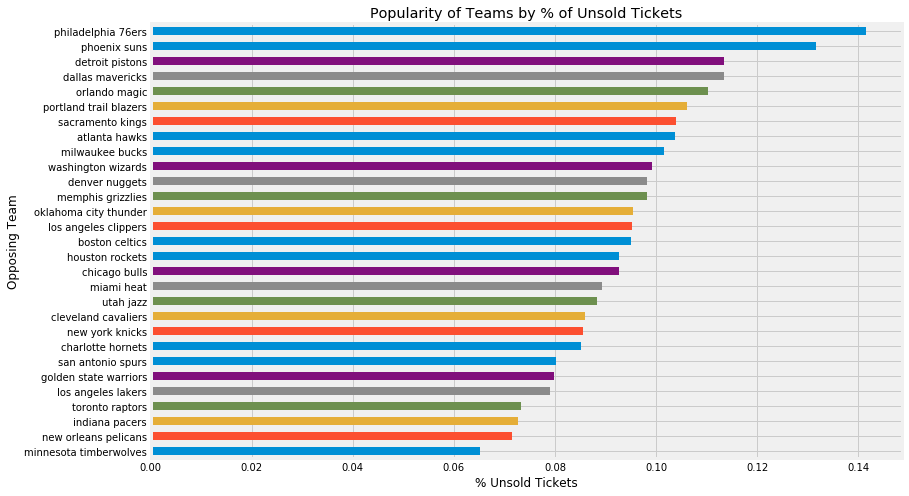

In [16]:
plt.figure()
fig, ax = plt.subplots(figsize=(12, 8))

title = 'Popularity of Teams by % of Unsold Tickets'
x = '% Unsold Tickets'
y = 'Opposing Team'

opp_data.groupby('opponent').sold.mean().sort_values(ascending=True).plot(kind='barh', title=title)

plt.xlabel(x)
plt.ylabel(y)
plt.show()
fig.tight_layout()
fig.savefig("team_popularity.png")

<Figure size 432x288 with 0 Axes>

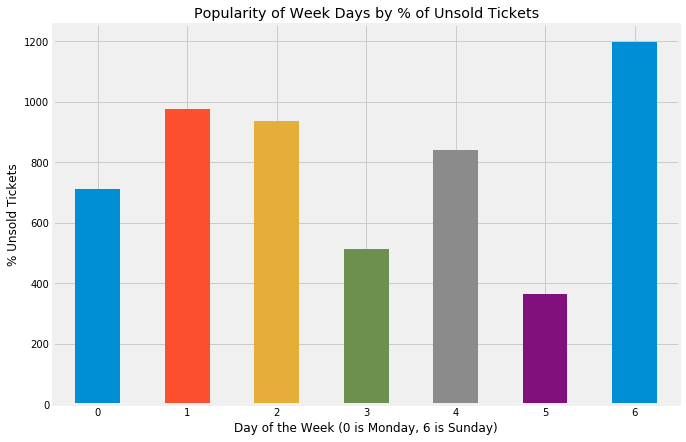

In [21]:
plt.figure()
fig, ax = plt.subplots(figsize=(12, 8))

title = 'Popularity of Week Days by % of Unsold Tickets'
x = 'Day of the Week (0 is Monday, 6 is Sunday)'
y = '% Unsold Tickets'

nets_data.groupby('dayofweek').sold.sum().plot(kind='bar', figsize=(10,7), title = title, rot=0)

plt.xlabel(x)
plt.ylabel(y)
plt.show()
fig.tight_layout()
#fig.savefig("dayofweek_popularity.png")

<Figure size 432x288 with 0 Axes>

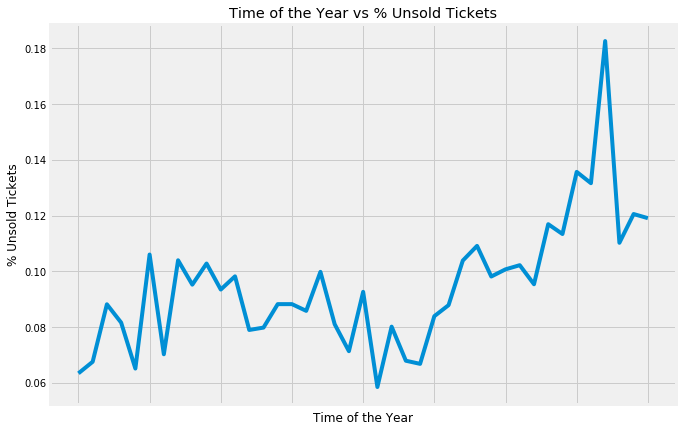

In [19]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 7))
title = 'Time of the Year vs % Unsold Tickets'
x = 'Time of the Year'
y = '% Unsold Tickets'

opp_data.groupby('event_date').sold.mean().plot(kind='line', figsize=(10,7), title = title)

plt.xlabel(x)
plt.ylabel(y)
plt.show()
fig.tight_layout()
fig.savefig("timeofyear_popularity.png")

# Distribution of unsold ticket prices

In [11]:
nets_data_rev = nets_data[nets_data['revenue']<=1000]

<Figure size 432x288 with 0 Axes>

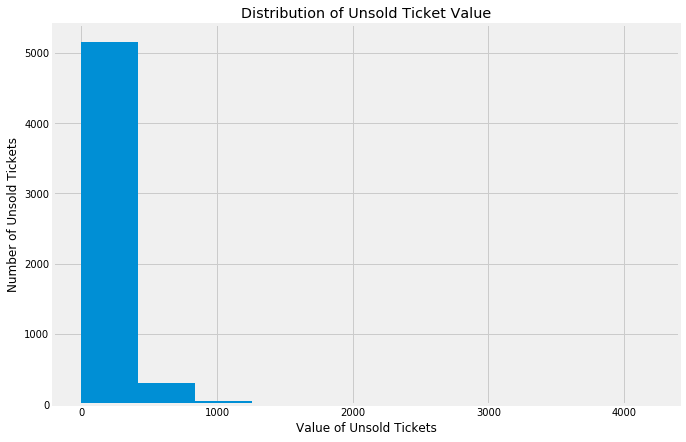

In [20]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 7))

title = "Distribution of Unsold Ticket Value"
x = "Value of Unsold Tickets"
y = "Number of Unsold Tickets"

nets_data[nets_data['sold']==1].revenue.hist(figsize=(10,7))

plt.title(title)
plt.xlabel(x)
plt.ylabel(y)
plt.show()
fig.tight_layout()
fig.savefig("price_unsold_dist.png")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


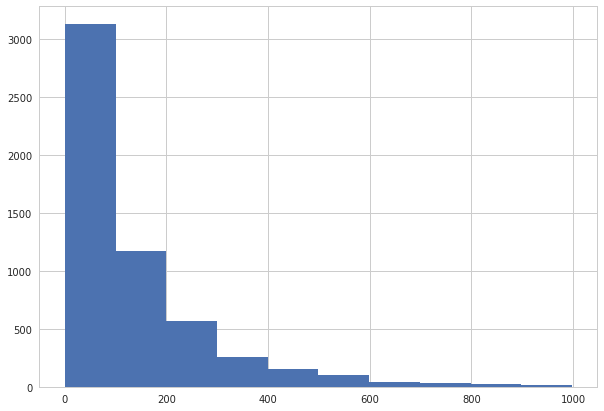

In [80]:
plt.figure()

nets_data_rev[nets_data['sold']==1].revenue.hist(figsize=(10,7))